In [1]:
# import statements
import pandas as pd
from pandas import DataFrame
from numpy import nan
import csv
from matplotlib import pyplot as plt
import os

In [2]:
# read the assay files and load the data into a data frame
def load_df(filename):
    f = open(filename)
    data_raw = f.read()
    f.close()

    data1 = data_raw.split('\n')
    data2 = data1[1:]
    header = data1[0]
    indices = header.split('\t')
    data3 = [i.split('\t') for i in data2]
    data = DataFrame(data3, columns = indices)
    data = data.replace('', nan)
    data = data.replace('None', nan)
    data = data.dropna()
    df = data.iloc[:150] # trim to consider about 24 hrs
    for col in df: # type conversions for all columns
        if col == 'Time' or col == 'T 500':
            continue
        df.loc[:,col] = df[col].astype(float)
    return df    

In [3]:
# works for 384 (16x24) welled plate
def graph_df(df, red = []):
    fig, ax = plt.subplots(nrows = 16, ncols = 24, sharex = True, sharey = True, figsize = (20, 20))
    cols = list(df.columns[2:])
    for col in df.columns[2:]: # exclude the non-well columns
        # print(col, end=' ')
        index = cols.index(col)
        ax[index//24][index%24].plot(df.index, df[col])
        ax[index//24][index%24].get_xaxis().set_visible(False)
        ax[index//24][index%24].get_yaxis().set_visible(False)
    
    for col in red:
        index = cols.index(col)
        ax[index//24][index%24].set_facecolor('xkcd:light pastel green')
        
#         if col in red:
#             ax[index//24][index%24].set_facecolor('red')

In [4]:
# inspect 4 wells
def inspect_well(df, w1, w2, w3, w4):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (4,4))
    ax[0,0].plot(df.index, df[w1])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,1].plot(df.index, df[w2])
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].get_yaxis().set_visible(False)
    ax[1,0].plot(df.index, df[w3])
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].get_yaxis().set_visible(False)
    ax[1,1].plot(df.index, df[w4])
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].get_yaxis().set_visible(False)

In [5]:
files = ["data/"+item for item in os.listdir("data") if item.endswith('.txt')]
files

['data/Rutuja 04 06.txt',
 'data/Rutuja 04 08.txt',
 'data/Rutuja 04 09.txt',
 'data/Rutuja 04 10.txt',
 'data/Rutuja 04 28.txt',
 'data/Rutuja 04 30.txt',
 'data/Rutuja 05 03.txt',
 'data/Rutuja 05 05.txt',
 'data/Rutuja 11 02.txt']

In [8]:
df1 = load_df(files[0])
print(files[0])
df2 = load_df(files[1])
print(files[1])
df3 = load_df(files[2])
print(files[2])
df4 = load_df(files[3])
print(files[3])
df5 = load_df(files[4])
print(files[4])
df6 = load_df(files[5])
print(files[5])
df7 = load_df(files[6])
print(files[6])
df8 = load_df(files[7])
print(files[7])

data/Rutuja 04 06.txt
data/Rutuja 04 08.txt
data/Rutuja 04 09.txt
data/Rutuja 04 10.txt
data/Rutuja 04 28.txt
data/Rutuja 04 30.txt
data/Rutuja 05 03.txt
data/Rutuja 05 05.txt


In [21]:
string1 = "B1 D1 E1 F1 G1 H1 I1 J1 K1 L1 M1 E2 F2 G2 H2 I2 J2 K2 L2 M2 N2 O2 P2 B3 I3 B4 C4 E4 I4 J4 L4 M4 N4 B5 P5 P6 B7 D7 F7 H7 L7 A8 B8 D8 O8 P8 B9 H9 J9 O9 P9 B10 L10 O10 P10 B11 L11 B12 D12 N12 O12 B13 L13 A14 B14 E14 I14 L14 M14 N14 O14 P14 A15 E15 F15 H15 L15 N15 O15 P15 A16 D16 H16 L16 N16 O16 P16 C17 F17 J17 K17 O17 P17 B18 D18 I18 J18 L18 N18 O18 P18 F19 H19 J19 B20 D20 F20 P20 D21 P21 A22 C22 D22 E22 F22 H22 P22 H23 J23 K23 L23 M23 N23 O23 D24 E24 F24 G24 I24"
l1 = string1.split()
l1 = list(set(l1))
len(l1)

129

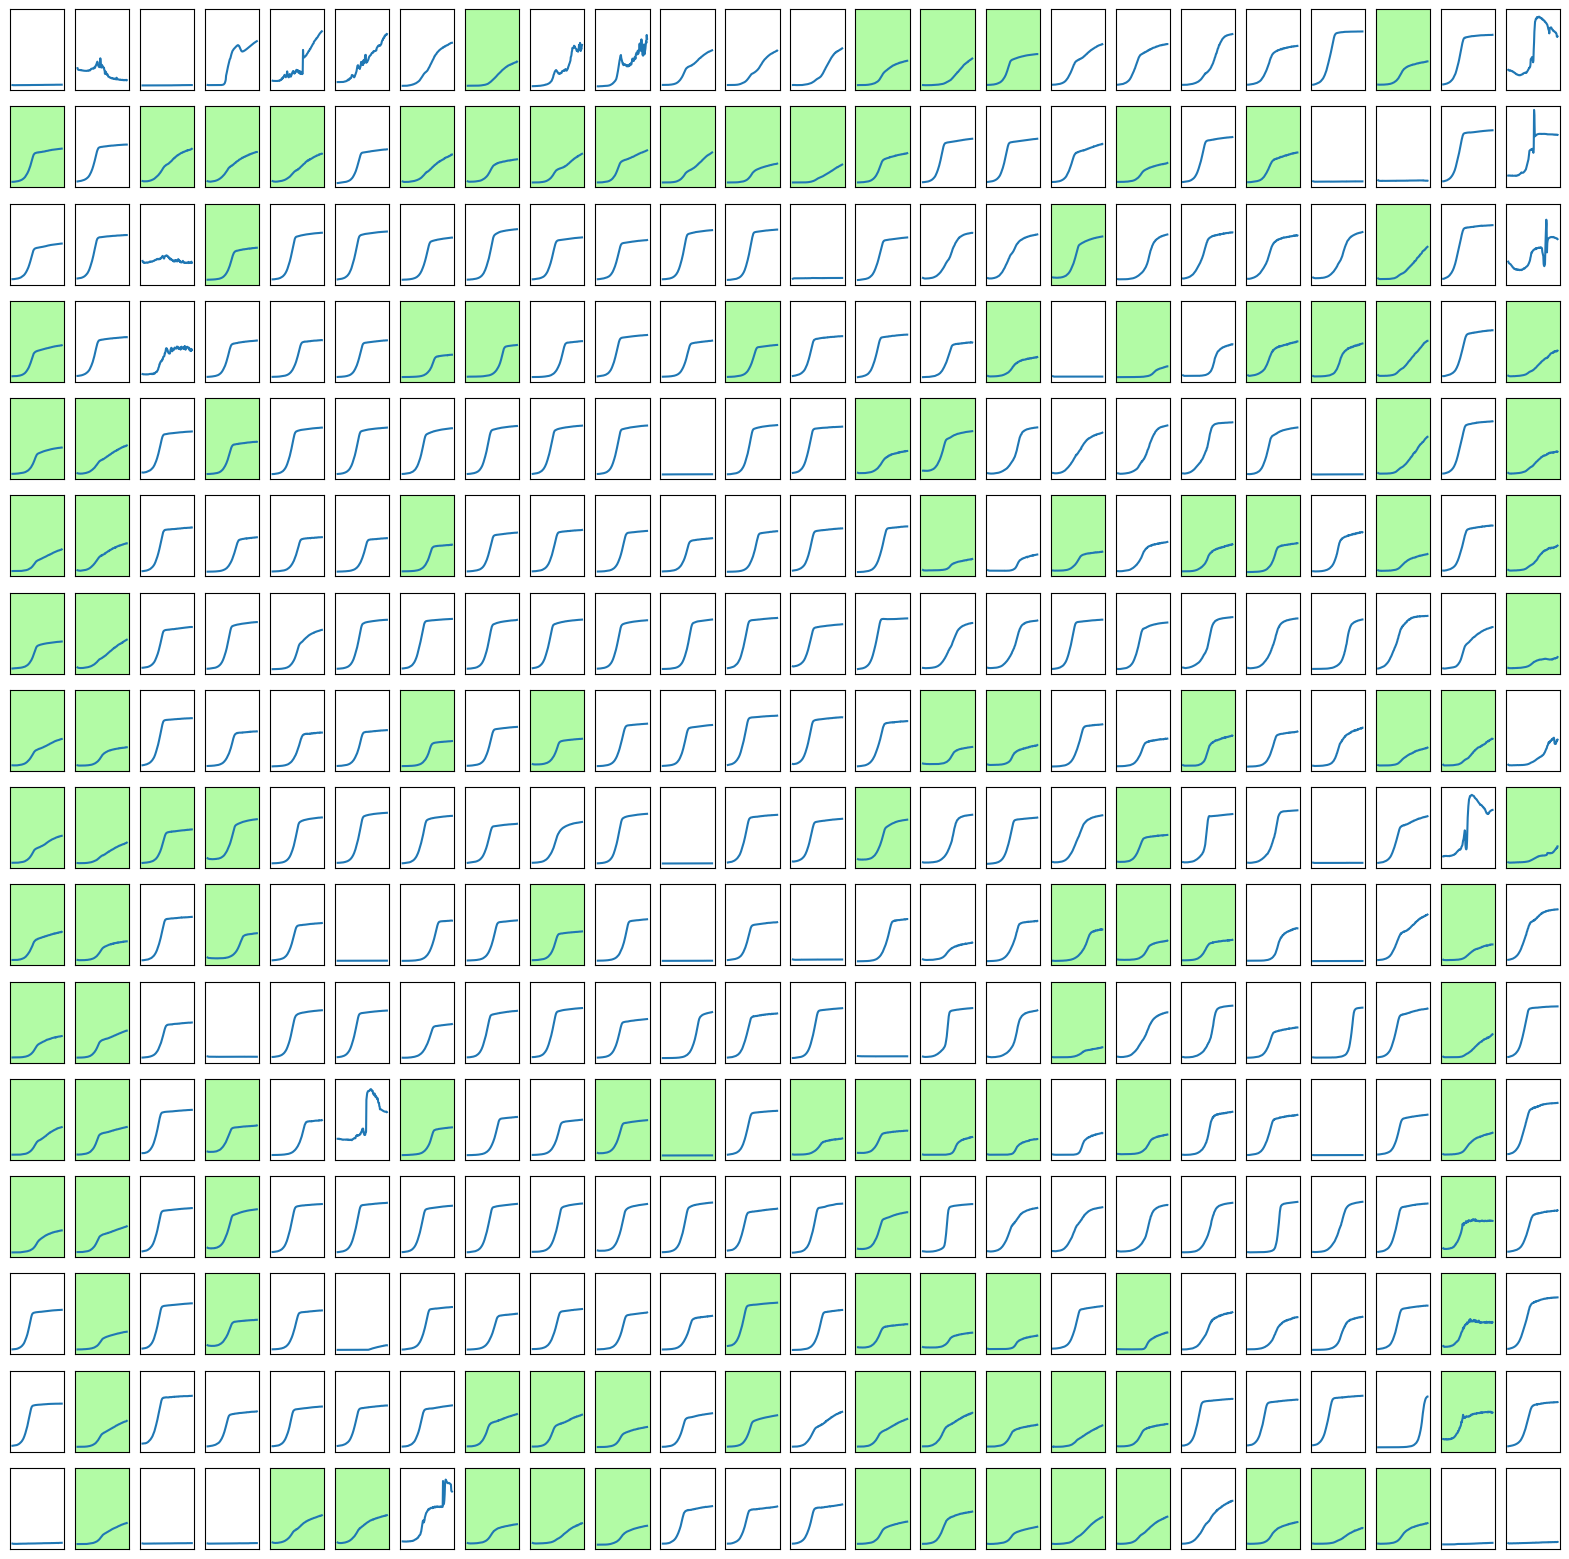

In [22]:
graph_df(df1, l1)

In [80]:
string2 = "B1 C1 F1 G1 H1 I1 L1 M1 N1 A2 D2 E2 F2 L2 O2 P2 A3 C3 F3 G3 H3 L3 M3 P3 A4 G4 I4 J4 K4 M4 O4 P4 C5 E5 F5 J5 M5 N5 O5 P5 B6 D6 E6 J6 K6 L6 N6 O6 C7 E7 F7 H7 J7 M7 N7 O7 A8 B8 G8 H8 I8 L8 N8 G9 I9 N9 P9 A10 F10 G10 H10 J10 K10 L10 M10 O10 A11 C11 E11 F11 G11 H11 J11 L11 M11 N11 O11 P11 D12 E12 G12 J12 L12 M12 O12 P12 D13 E13 G13 J13 L13 N13 A14 B14 A15 B15 P15 A16 B16 J16 N16 O16 P16 O17 P17 B18 F18 I18 J18 O18 P18 A19 H19 O19 A20 B20 F20 H20 J20 L20 N20 A21 B21 E21 J21 K21 P21 E22 F22 I22 J22 K22 L22 O22 P22 A23 F23 G23 H23 I23 P23 I24 J24 K24 L24"
l2 = string2.split()
l2 = list(set(l2))
len(l2)

155

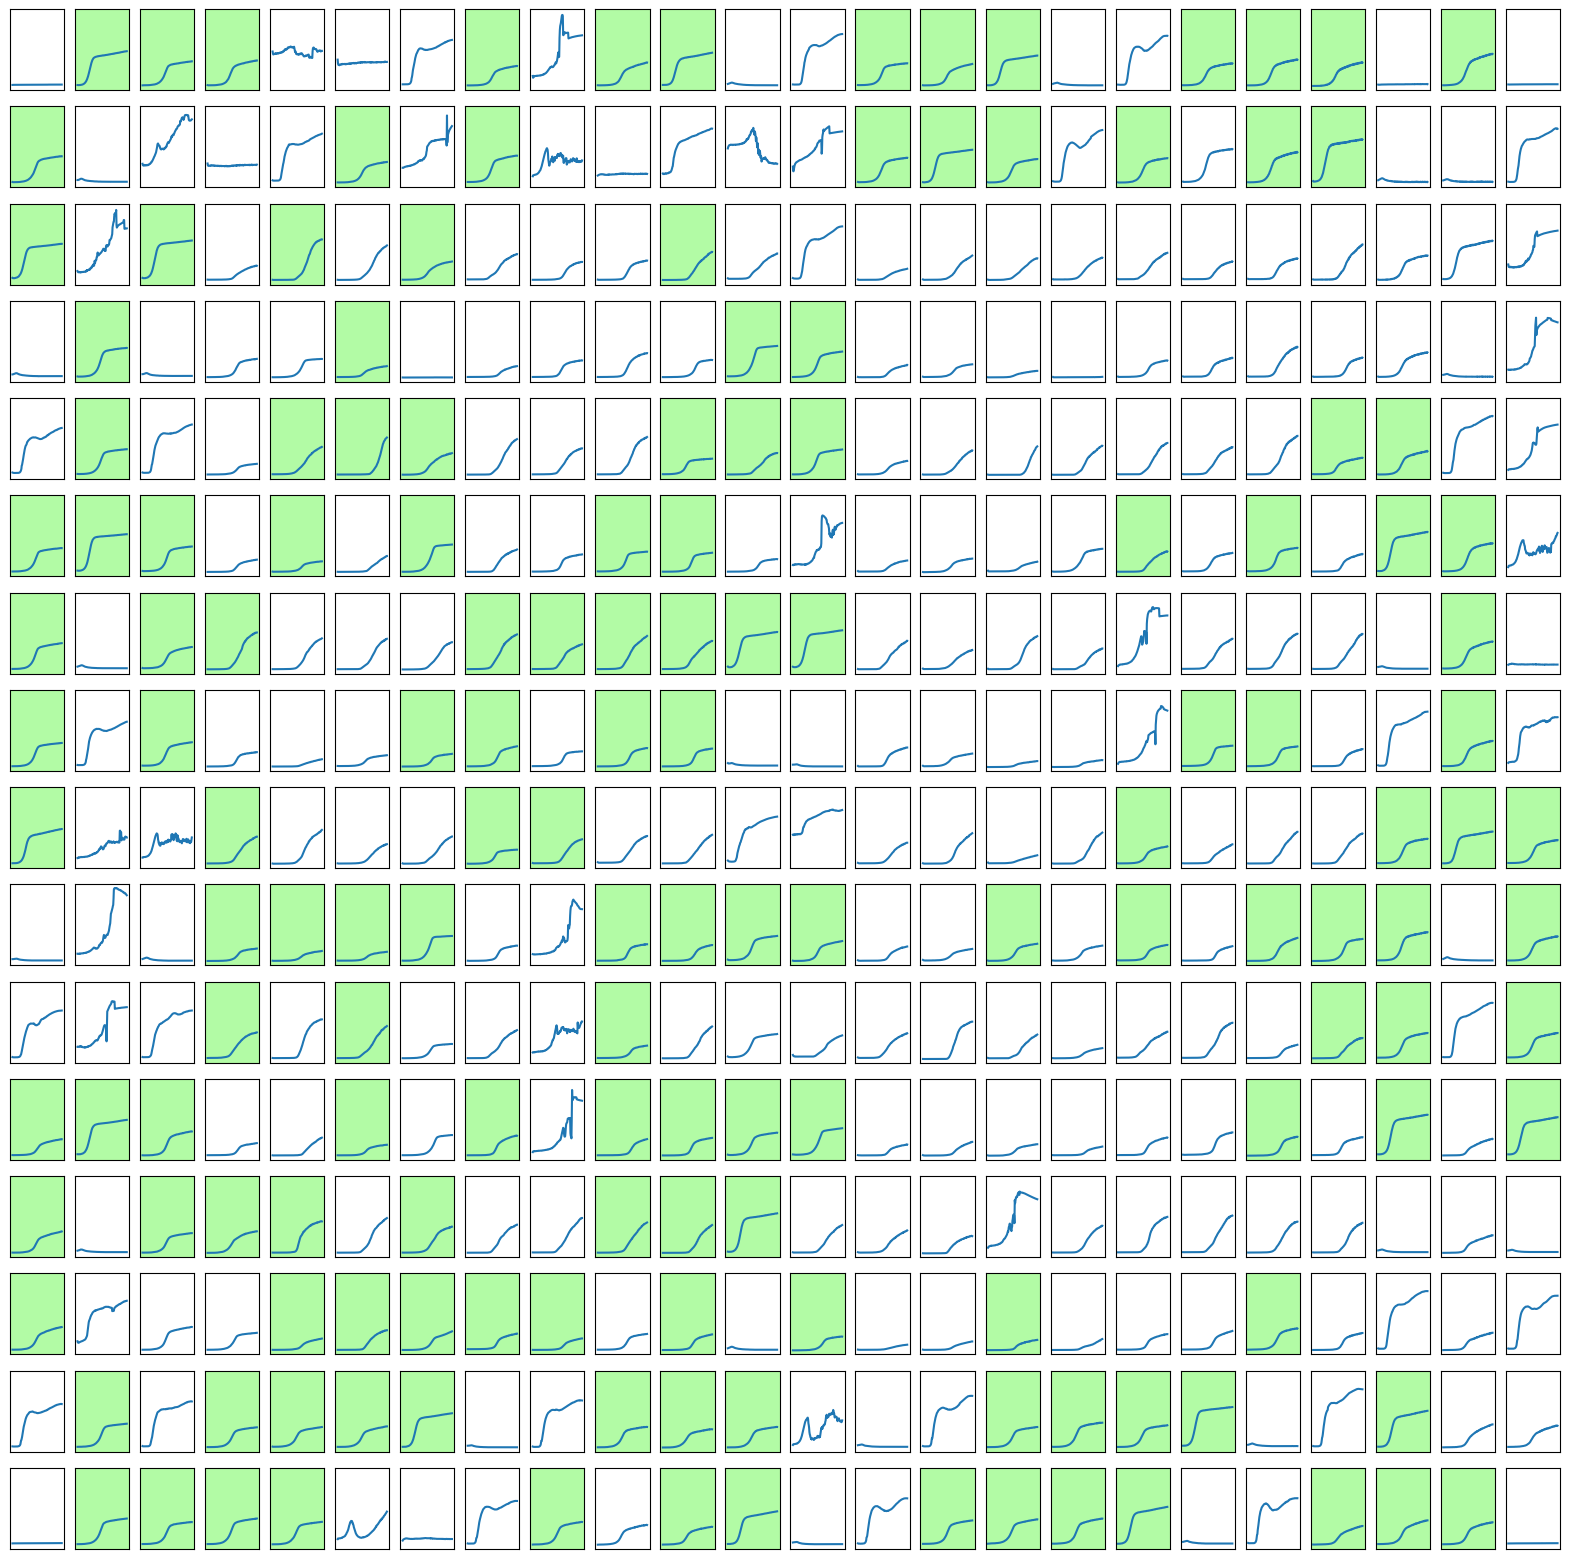

In [81]:
graph_df(df2, l2)

In [82]:
string3 = "F1 G1 I1 L1 M1 A2 C2 D2 E2 F2 I2 J2 K2 L2 O2 P2 A3 B3 C3 F3 G3 H3 I3 L3 M3 N3 P3 A4 D4 E4 F4 G4 O4 P4 A5 C5 E5 F5 G5 H5 I5 J5 K5 M5 N5 O5 B6 C6 D6 E6 F6 H6 I6 J6 K6 M6 N6 O6 P6 B7 D7 F7 G7 H7 J7 M7 O7 A8 B8 C8 K8 A9 B9 C9 D9 E9 F9 G9 I9 J9 L9 M9 A10 D10 E10 F10 G10 K10 M10 N10 O10 P10 A11 E11 F11 G11 H11 I11 K11 L11 M11 N11 O11 P11 B12 C12 D12 F12 M12 O12 P12 B13 E13 F13 G13 J13 K13 L13 N13 O13 A14 B14 E14 M14 A15 B15 D15 E15 F15 G15 K15 P15 C16 F16 H16 K16 L16 N16 O16 A17 D17 G17 H17 J17 P17 H18 M18 P18 B19 D19 K19 M19 O19 A20 F20 K20 N20 A21 B21 P21 A22 C22 D22 E22 F22 I22 K22 L22 O22 P22 A23 C23 F23 G23 H23 I23 L23 N23 O23 P23 C24 D24 F24 K24 L24 O24"
l3 = string.split()
l3 = list(set(l3))
len(l3)

234

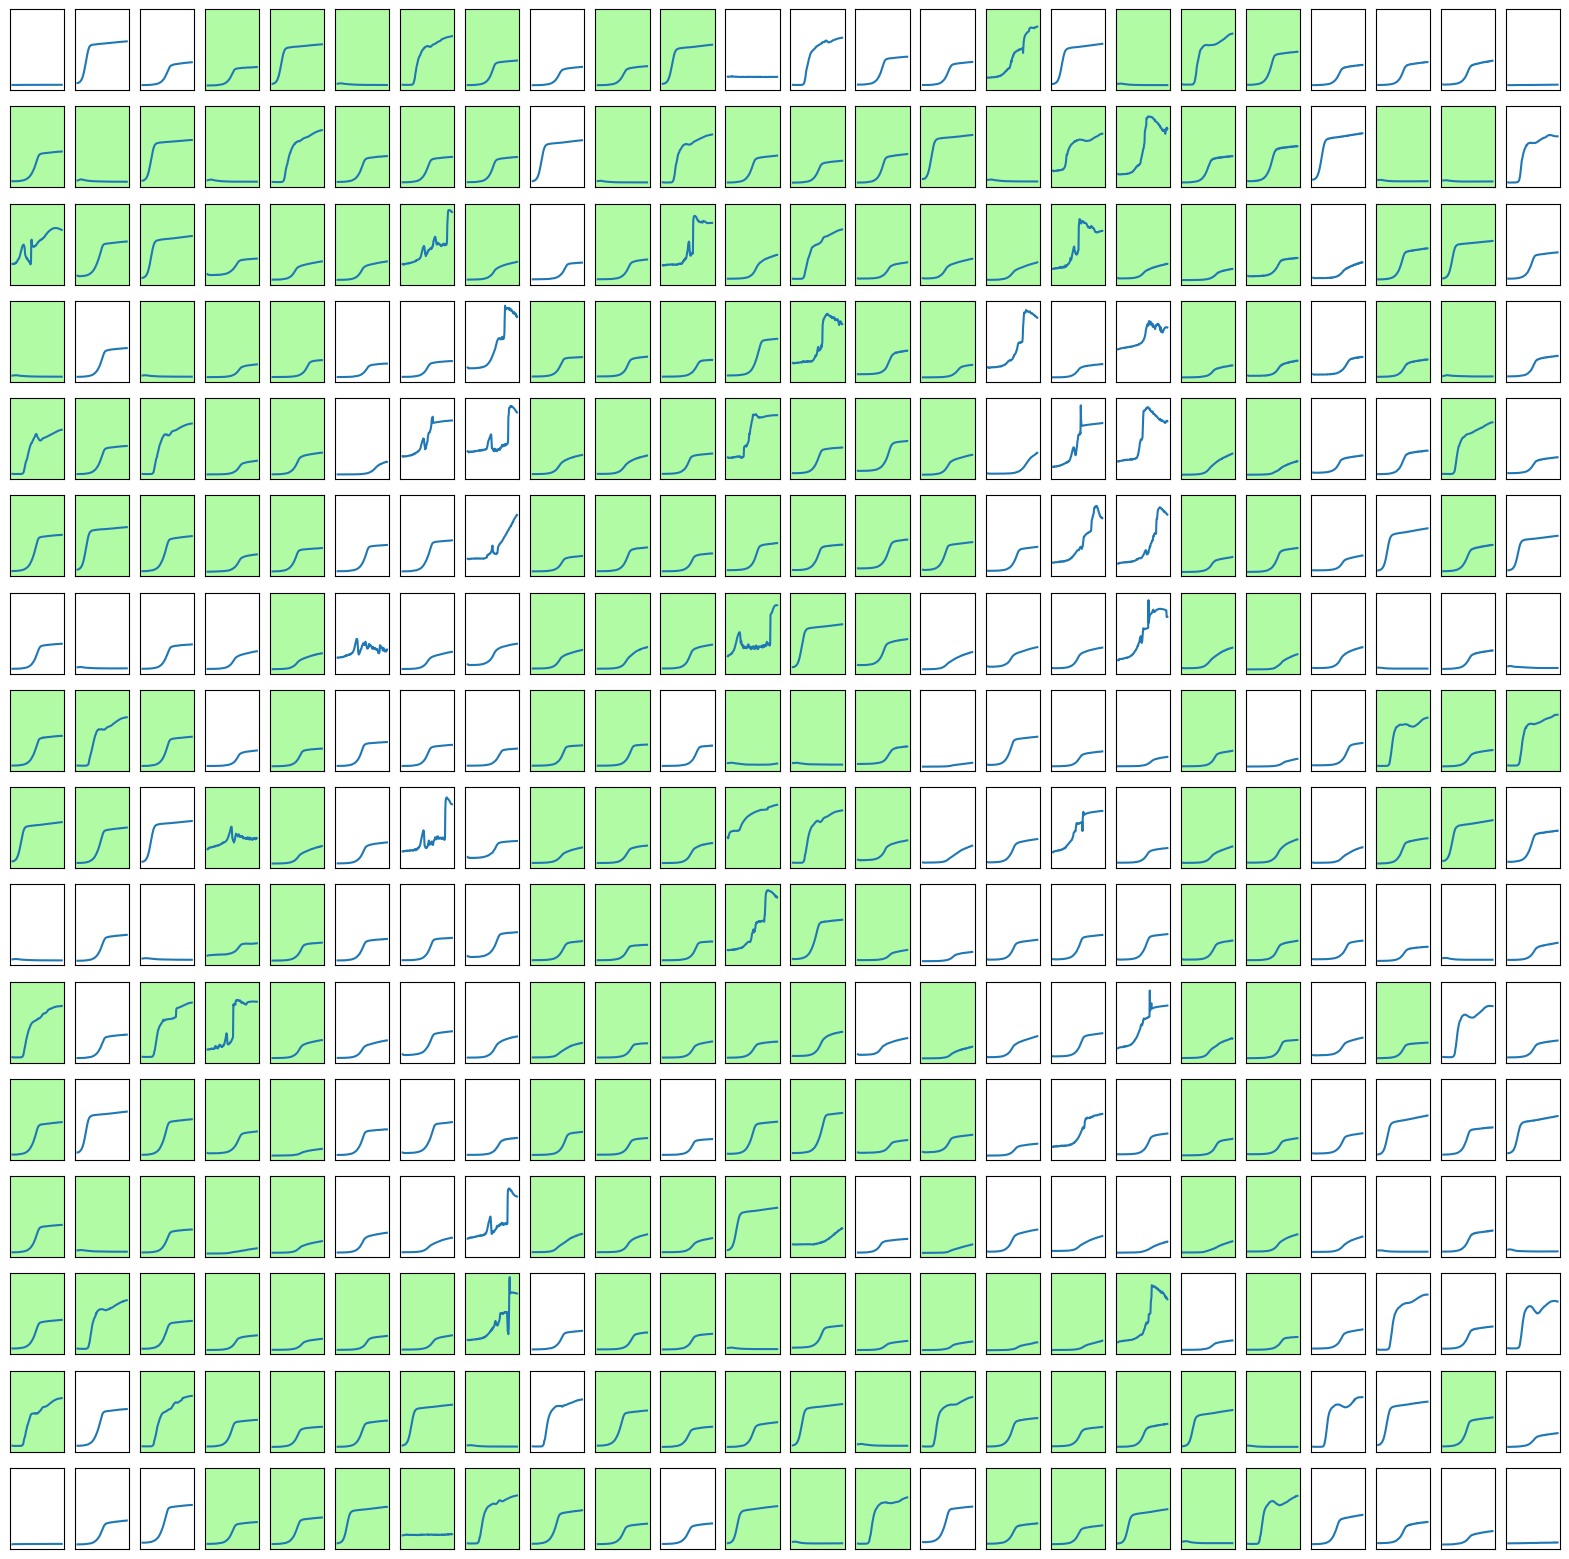

In [83]:
graph_df(df3, l)

In [84]:
string4 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l4 = string4.split()
l4 = list(set(l4))
len(l4)

208

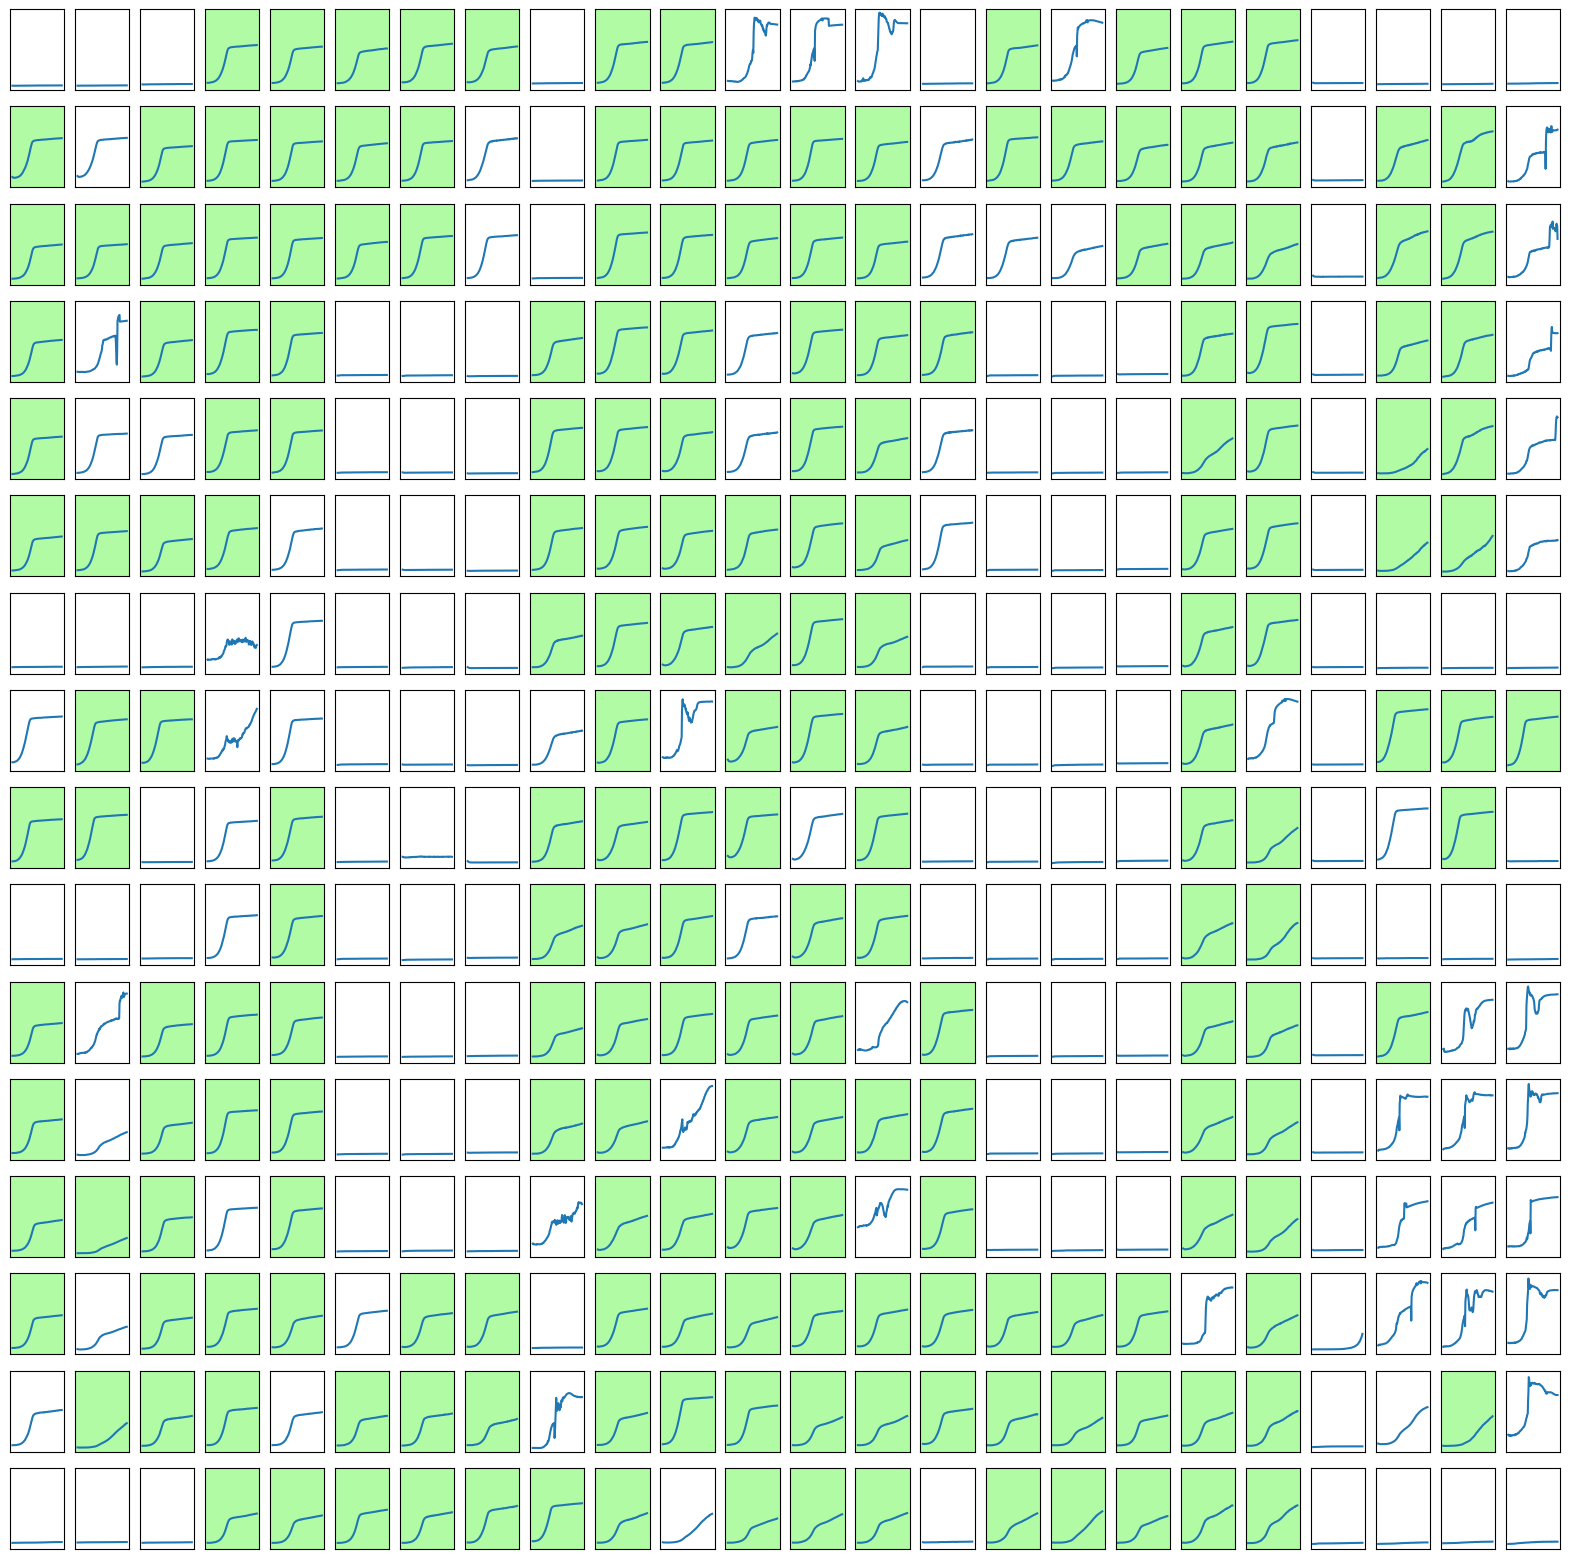

In [85]:
graph_df(df4, l4)

In [ ]:
string5 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l5 = string5.split()
l5 = list(set(l5))
len(l5)

In [ ]:
string6 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l6 = string6.split()
l6 = list(set(l6))
len(l6)

In [ ]:
string7 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l7 = string7.split()
l7 = list(set(l7))
len(l7)

In [11]:
string8 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l8 = string8.split()
l8 = list(set(l8))
len(l8)

208

In [ ]:
string9 = "B1 C1 D1 E1 F1 I1 K1 L1 M1 N1 C2 F2 H2 I2 M2 O2 B3 C3 D3 F3 H3 K3 L3 M3 N3 O3 A4 B4 C4 D4 E4 F4 K4 L4 N4 O4 P4 A5 B5 C5 D5 E5 I5 J5 K5 L5 M5 N5 P5 A6 B6 C6 O6 P6 A7 B7 C7 N7 O7 P7 A8 N8 O8 P8 D9 E9 F9 G9 I9 J9 K9 L9 P9 A10 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 P10 A11 B11 C11 D11 E11 F11 G11 I11 J11 K11 M11 N11 O11 B12 C12 F12 G12 H12 I12 K12 L12 M12 N12 O12 P12 B13 C13 D13 E13 F13 G13 H13 J13 K13 L13 M13 N13 O13 P13 B14 C14 D14 E14 F14 G14 H14 I14 J14 L14 N14 O14 P14 D15 K15 L15 M15 N15 O15 A16 B16 N16 O16 P16 B17 N17 O17 P17 A18 B18 C18 N18 O18 P18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 O19 P19 A20 B20 C20 D20 E20 F20 G20 I20 J20 K20 L20 M20 N20 O20 P20 B22 C22 D22 E22 F22 H22 K22 B23 C23 D23 E23 F23 H23 I23 O23 H24"
l9 = string9.split()
l9 = list(set(l9))
len(l9)